In [53]:
import matplotlib.pyplot as plt
from   dlsAnalyzer       import *

plt.rcParams['figure.figsize'] = [10, 5]

In [42]:
dls               = dlsAnalyzer()
l                 = dls.loadExperiment("test.csv","test")
d                 = dls.experimentsOri["test"] 

d.lambda0         = 817                #  Laser wavelength in nanometers
d.scatteringAngle = 150 / 180 * np.pi  #  Angle of detection in radians
d.getQ()                               #  Calculate the Bragg wave vector
d.createFittingS_space(0.09,1e6,200)   #  Discretize the decay rate space we will use for the fitting
d.setAutocorrelationData()             

## Autocorrelation curves

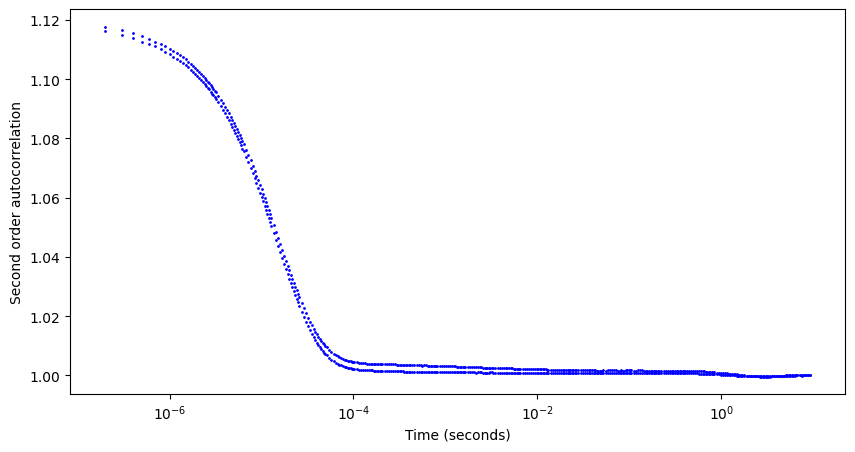

In [54]:
plt.xscale("log")
plt.plot(d.time,d.autocorrelation[:,0],'bo',markersize=1)
plt.plot(d.time,d.autocorrelation[:,1],'bo',markersize=1)
plt.xlabel("Time (seconds)")
plt.ylabel("Second order autocorrelation")
plt.show()

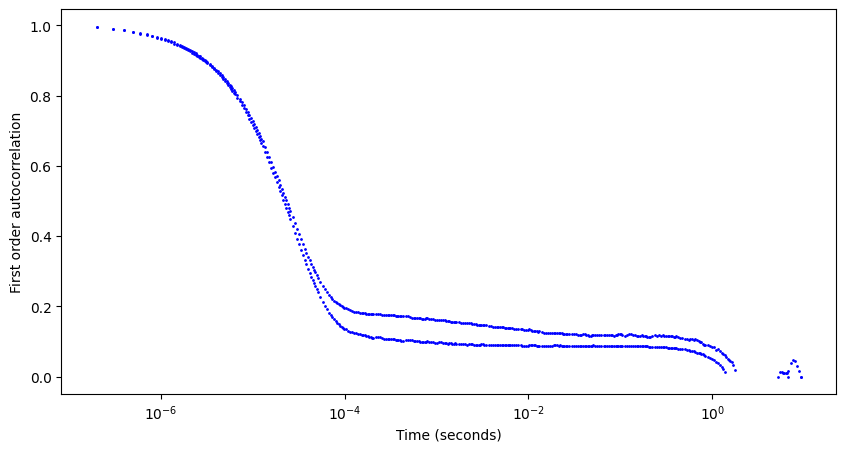

In [55]:
# Estimate the intercept of the second order autocorrelation curves
d.getBetaEstimate()   

# Compute  the first order autocorrelation curves
# Due to errors in measurement, same values can't be computed (negative sqrt)

d.getG1correlation()  

plt.xscale("log")
 
plt.plot(d.time,d.g1[:,0],'bo',markersize=1)
plt.plot(d.time,d.g1[:,1],'bo',markersize=1)
plt.xlabel("Time (seconds)")
plt.ylabel("First order autocorrelation")
plt.show()

## Fit the DLS data

In [56]:
d.getInitialEstimates()
d.getInitialEstimatesManyAlpha()
d.getOptimalAlphaLcurve()
d.getInitialEstimatesOptimalAlphaLcurve()
d.getInitialEstimatesManyAlpha()

## L-curve 

Text(0, 0.5, 'Log(penalty term)')

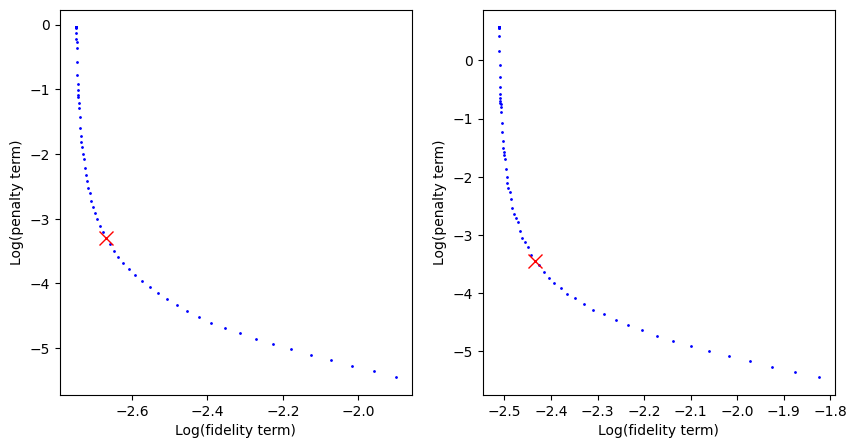

In [57]:
figure, axis = plt.subplots(1, 2)

axis[0].plot(np.log(d.curvesResidualNorm[:,0]),np.log(d.curvesPenaltyNorm[:,0]),'bo',markersize=1)
axis[0].plot(np.log(d.curvesResidualNorm[:,0])[d.alphaOptIdx[0]],
         np.log(d.curvesPenaltyNorm[:,0])[d.alphaOptIdx[0]],'x',color='red',markersize=10)

axis[0].set_xlabel("Log(fidelity term)")
axis[0].set_ylabel("Log(penalty term)")

axis[1].plot(np.log(d.curvesResidualNorm[:,1]),np.log(d.curvesPenaltyNorm[:,1]),'bo',markersize=1)
axis[1].plot(np.log(d.curvesResidualNorm[:,1])[d.alphaOptIdx[1]],
         np.log(d.curvesPenaltyNorm[:,1])[d.alphaOptIdx[1]],'x',color='red',markersize=10)

axis[1].set_xlabel("Log(fidelity term)")
axis[1].set_ylabel("Log(penalty term)")

## Fitted curves

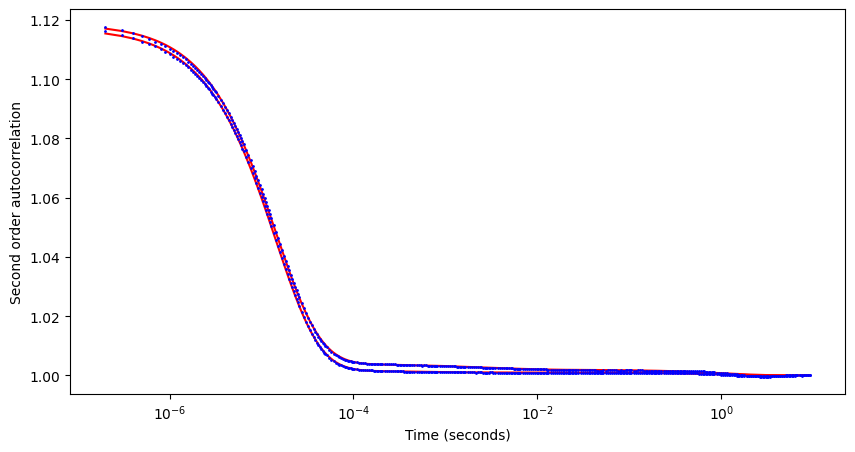

In [61]:
d.predictAutocorrelationCurves()

plt.xscale("log")

plt.plot(d.time,d.autocorrelationPredicted[:,0],'red')
plt.plot(d.time,d.autocorrelationPredicted[:,1],'red')
plt.plot(d.time,d.autocorrelation[:,0],'bo',markersize=1)
plt.plot(d.time,d.autocorrelation[:,1],'bo',markersize=1)

plt.xlabel("Time (seconds)")
plt.ylabel("Second order autocorrelation")
plt.show()

## Hydrodynamic radius distribution